In [1]:
import numpy as np
import rebound
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
path = "/data_local/arachkov/solar_system/test_cases/"

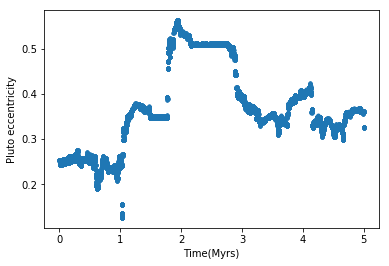

In [3]:
path = "/data_local/arachkov/solar_system/test_cases/"
sa = rebound.SimulationArchive(path+"outer_ss_noGR.bin")
times = np.empty(0)
ecc = np.empty(0)
for sim in sa:
    times = np.append(times,sim.t)
    o = sim.calculate_orbits()
    ecc = np.append(ecc,o[4].e)
plt.xlabel("Time(Myrs)")
plt.ylabel("Pluto eccentricity")
plt.plot(times/(365.e6),ecc,'.')
plt.show()

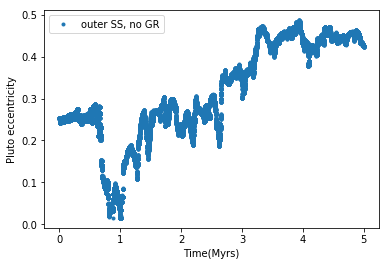

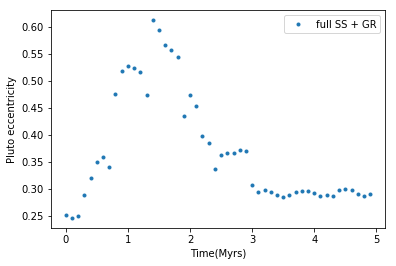

In [4]:
path = "/data_local/arachkov/solar_system/test_cases/"
f = "outer_ss_noGR_1.18471898958e-09.bin"
sa = rebound.SimulationArchive(path+f)
times = np.empty(0)
ecc = np.empty(0)
for sim in sa:
    times = np.append(times,sim.t)
    o = sim.calculate_orbits()
    ecc = np.append(ecc,o[4].e)
plt.xlabel("Time(Myrs)")
plt.ylabel("Pluto eccentricity")
plt.plot(times/(365.e6),ecc,'.',label = "outer SS, no GR")
plt.legend(loc="best")
plt.show()

path = "/data_local/arachkov/solar_system/laskar_stats/old_error/"
f = "finished_solar_system_kappa_1.18471898958e-09_simulationarchive.bin"
sa = rebound.SimulationArchive(path+f)
times = np.empty(0)
ecc = np.empty(0)
for sim in sa:
    if sim.t < 5.e6*365.:
        times = np.append(times,sim.t)
        o = sim.calculate_orbits()
        ecc = np.append(ecc,o[8].e)
    else:
        break
plt.xlabel("Time(Myrs)")
plt.ylabel("Pluto eccentricity")
plt.plot(times/(365.e6),ecc,'.',label = "full SS + GR")
plt.legend(loc="best")
plt.show()

In [5]:
sim = rebound.Simulation()
sim.add(["Sun","Jupiter","Saturn","Uranus","Neptune","Pluto"])

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Pluto'... Found: Pluto Barycenter (9).


In [6]:
sim.integrate(2.*np.pi*1e6)

In [7]:
sim.particles[-1].e

0.21956541002719365

In [8]:
sim = rebound.Simulation.from_file("outer_ss_ic.bin")

In [9]:
sim.particles[-1].x += 1e-6

In [10]:
sim.integrate(2.*np.pi*1e6)

only outer solar system planets added, Pluto's ecc does not change a lot over 1Myr

In [11]:
sim.particles[-1].e

0.21957207734003586

In [12]:
path = "/data_local/arachkov/solar_system/test_cases/"
sa = rebound.SimulationArchive(path+"outer_ss_noGR.bin")
sim = sa[0]
sim.status()
sim.integrate(1.e6*365.)
sim.particles[-1].e

---------------------------------
REBOUND version:     	3.2.4
REBOUND built on:    	Mar 22 2017 13:37:37
Number of particles: 	6
Selected integrator: 	whfast
Simulation time:     	0.000000
Current timestep:    	8.000000
---------------------------------
<rebound.Particle object, m=1.988544e+30 x=-0.00713909847806 y=-0.00278835221613 z=0.000206216131134 vx=5.32557963868e-06 vy=-7.46461934791e-06 vz=-9.51977321421e-08>
<rebound.Particle object, m=1.89813e+27 x=3.99632135591 y=2.93256486426 z=-0.101617022236 vx=-0.00455842527159 vy=0.0064398095922 vz=7.53749659397e-05>
<rebound.Particle object, m=5.68319e+26 x=6.40141693649 y=6.56525440159 z=-0.368921081978 vx=-0.00428521491946 vy=0.00388452627272 vz=0.000102514559335>
<rebound.Particle object, m=8.68103e+25 x=14.4233784843 y=-13.7384466338 z=-0.237922087893 vx=0.00268379166278 vy=0.00266496288727 vz=-2.48432917771e-05>
<rebound.Particle object, m=1.0241e+26 x=16.8036176883 y=-24.995439617 z=0.127477233847 vx=0.00258454089078 vy=0.0017688

0.2431355161885328

But when using the older initial conditions and changing the x position, the eccentricity changes by a larger factor

In [13]:
path = "/data_local/arachkov/solar_system/test_cases/"
sa = rebound.SimulationArchive(path+"outer_ss_noGR.bin")
sim = sa[0]
sim.particles[-1].x += 1e-6
sim.integrate(1.e6*365.)
sim.particles[-1].e

0.2535519334375796

In [14]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Uranus")
sim.add("Neptune")
sim.add("Pluto")

sim.convert_particle_units('AU', 'day', 'kg')
sim.integrator = "whfast"
sim.dt = 8.
sim.save("test_ic.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Pluto'... Found: Pluto Barycenter (9).


In [15]:
sim.status()
#sim.integrate(1.e6*2.*np.pi)
sim.integrate(1.e6*365.)
sim.particles[-1].e

---------------------------------
REBOUND version:     	3.2.4
REBOUND built on:    	Mar 22 2017 13:37:37
Number of particles: 	6
Selected integrator: 	whfast
Simulation time:     	0.000000
Current timestep:    	8.000000
---------------------------------
<rebound.Particle object, m=1.98849925145e+30 x=0.00272377880432 y=0.00513497396344 z=-0.000141603722298 vx=-4.45091767977e-06 vy=5.99780624532e-06 vz=9.95999480081e-08>
<rebound.Particle object, m=1.89860300869e+27 x=-4.94967034691 y=-2.27134468421 z=0.12012773943 vx=0.00305911523666 vy=-0.00650041979796 vz=-4.14306466188e-05>
<rebound.Particle object, m=5.68483446209e+26 x=-0.898501715524 y=-10.0113435574 z=0.209828366052 vx=0.00525035490331 vy=-0.000516558108275 vz=-0.000199984761514>
<rebound.Particle object, m=8.68227240036e+25 x=18.0395137102 y=8.46118257067 z=-0.202279903926 vx=-0.00169897237025 vy=0.00337752659025 vz=3.45564846258e-05>
<rebound.Particle object, m=1.02435227758e+26 x=28.5183737452 y=-9.13393653438 z=-0.4691387125

0.21883611179499507

In [16]:
sim = rebound.Simulation.from_file("test_ic.bin")
N = sim.N
#for n in range(0,N):
#    sim.particles[n].x += 1e-6

k = 1.18471898958e-09
k = 1.0+(k*1.e-2)

o = sim.calculate_orbits()

new_sim = rebound.Simulation()
new_sim.G = 1.4880826e-34
p = sim.particles[0]
new_sim.add(m=p.m,x=p.x,y=p.y,z=p.z,vx=p.vx,vy=p.vy,vz=p.vz)
for i in range(0,N-1):
        p = sim.particles[i+1]
        new_sim.add(m=p.m,a=o[i].a,e=k*o[i].e,inc=o[i].inc,Omega=o[i].Omega,omega=o[i].omega,f=o[i].f)
new_sim.integrator = "whfast"
new_sim.dt = 8.
new_sim.move_to_com()
new_sim.save("new_test_ic.bin")
 


All outer solar system planets have their eccentricties boosted by a small amount. Pluto's eccentricity does not change by a lot.

In [17]:
new_sim.integrate(1.e6*365.)
new_sim.particles[-1].e

0.218837429755695

In [18]:
path = "/data_local/arachkov/solar_system/test_cases/"
sa = rebound.SimulationArchive(path+"outer_ss_noGR.bin")
sim = sa[0]
sim.status()
sim.integrate(1.e6*365.)
sim.particles[-1].e

---------------------------------
REBOUND version:     	3.2.4
REBOUND built on:    	Mar 22 2017 13:37:37
Number of particles: 	6
Selected integrator: 	whfast
Simulation time:     	0.000000
Current timestep:    	8.000000
---------------------------------
<rebound.Particle object, m=1.988544e+30 x=-0.00713909847806 y=-0.00278835221613 z=0.000206216131134 vx=5.32557963868e-06 vy=-7.46461934791e-06 vz=-9.51977321421e-08>
<rebound.Particle object, m=1.89813e+27 x=3.99632135591 y=2.93256486426 z=-0.101617022236 vx=-0.00455842527159 vy=0.0064398095922 vz=7.53749659397e-05>
<rebound.Particle object, m=5.68319e+26 x=6.40141693649 y=6.56525440159 z=-0.368921081978 vx=-0.00428521491946 vy=0.00388452627272 vz=0.000102514559335>
<rebound.Particle object, m=8.68103e+25 x=14.4233784843 y=-13.7384466338 z=-0.237922087893 vx=0.00268379166278 vy=0.00266496288727 vz=-2.48432917771e-05>
<rebound.Particle object, m=1.0241e+26 x=16.8036176883 y=-24.995439617 z=0.127477233847 vx=0.00258454089078 vy=0.0017688

0.2431355161885328

In [19]:
path = "/data_local/arachkov/solar_system/test_cases/"
sa = rebound.SimulationArchive(path+"outer_ss_noGR.bin")
sim = sa[0]

N = sim.N
#for n in range(0,N):
#    sim.particles[n].x += 1e-6

k = 1.18471898958e-09
k = 1.0+(k*1.e-2)

o = sim.calculate_orbits()

new_sim = rebound.Simulation()
new_sim.G = 1.4880826e-34
p = sim.particles[0]
new_sim.add(m=p.m,x=p.x,y=p.y,z=p.z,vx=p.vx,vy=p.vy,vz=p.vz)
for i in range(0,N-1):
        p = sim.particles[i+1]
        new_sim.add(m=p.m,a=o[i].a,e=k*o[i].e,inc=o[i].inc,Omega=o[i].Omega,omega=o[i].omega,f=o[i].f)
new_sim.integrator = "whfast"
new_sim.dt = 8.
new_sim.move_to_com()


Again, when I do the same with the older initial conditions, the eccentricity changes more drastically.

In [20]:
new_sim.integrate(1.e6*365.)
new_sim.particles[-1].e

0.4072956409363988

In [21]:
sim = rebound.Simulation()
sim.add(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto"])

sim.convert_particle_units('AU', 'day', 'kg')
sim.integrator = "whfast"
sim.dt = 8.
sim.save("test_ic.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Pluto'... Found: Pluto Barycenter (9).


In [22]:
sim.integrate(1.e6*365.)

In [23]:
sim.particles[-1].e

0.21863848162108457

In [24]:
sim = rebound.Simulation.from_file("test_ic.bin")
N = sim.N
#for n in range(0,N):
#    sim.particles[n].x += 1e-6

k = 1.18471898958e-09
k = 1.0+(k*1.e-2)

o = sim.calculate_orbits()

new_sim = rebound.Simulation()
new_sim.G = 1.4880826e-34
p = sim.particles[0]
new_sim.add(m=p.m,x=p.x,y=p.y,z=p.z,vx=p.vx,vy=p.vy,vz=p.vz)
for i in range(0,N-1):
        p = sim.particles[i+1]
        new_sim.add(m=p.m,a=o[i].a,e=k*o[i].e,inc=o[i].inc,Omega=o[i].Omega,omega=o[i].omega,f=o[i].f)
new_sim.integrator = "whfast"
new_sim.dt = 8.
new_sim.move_to_com()
new_sim.save("new_test_ic.bin")

In [25]:
new_sim.integrate(1.e6*365.)

With all planets, Pluto's eccentricity changes by a larger factor but still small, around 1e-4

In [26]:
new_sim.particles[-1].e

0.21859996980085789